CONNOR NELSON & FAITH CAMP & SANDRA KETA

The dataset that our group is working with is the arrest data of Chapel Hill, North Carolina from the years 2010 to 2016. Features include the date and time the arrest was made, as well as the address of the arrest. The crime committed is given to us as a classification of a felony or a misdemeanor, a UCR code, and a short description of the crime. The arrestee is described with features of age, race, sex, and ethnicity. The dataset has 18,809 rows and 11 features (columns). 

Our goal of analyzing this data set is to figure out if we can determine the age and gender of an arrestee given a crime. Doing this would allow us to see trends in crime among certain age groups, for example: all underage drinking crimes are committed by people under the age of 21. However, our analysis would like to look at less obvious tendencies in arrest data relating to other crimes. We would also like to observe gender’s role in the arrest data, and see if there are any trends in certain crimes only being committed by one gender or the other (or if there are no discrepancies at all). With this analysis, we can get a better picture of what crimes are associated with what demographic in Chapel Hill during this time period by looking at one feature at a time. This is a question of classification. 

We will be approaching this analysis while taking into account current and supported crime trend data regarding gender and race when it comes to the commission of crime. While analyzing the data, we are aware of the biases that police tend to have while carrying out arrests and law enforcement, and therefore recognize that this bias, has the potential to overrepresent the African American or Minority race in this data frame. We are also aware of the researched and supported trends regarding gender. Men are more likely to commit crime than women; men are more likely to commit violent crime, while women are more likely to commit property crime life larceny and other forms of theft. Taking this into account, it is our goal to use gender as a potential control variable to limit its impact and influence on the results, by skewing the data one way or the other.

Next, we will look at changing our question to be a better example of classification by looking at age, gender, and race and using those features to predict their crime. We will also try to fix our problems with linear regression, since it shows we have 0 axes.


In [46]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn     

In [47]:
pam = pa.read_csv('police-arrests-made.csv', sep = ';')

The pairplot below only shows two features. This is because only these two are numeric values, whereas the rest are objects. As a result, this is not a good way to compare these variables.

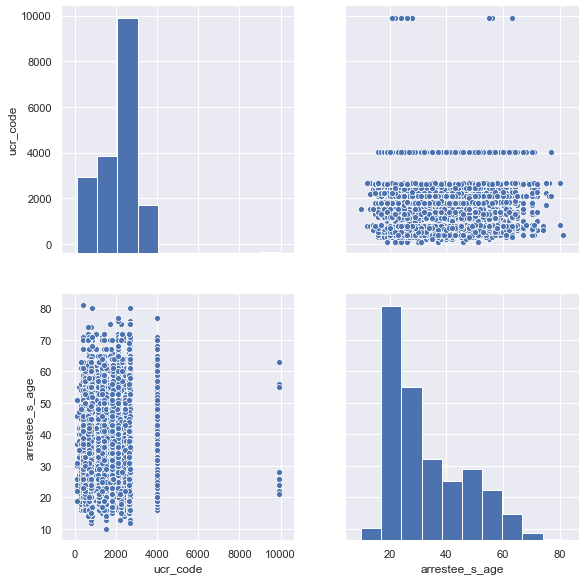

In [48]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(9, 9)  


The histogram below shows the comparison between the black attribute for race and the six other race markers. The African American arrest numbers are JUST below that of the other six races combined. This speaks to the bias that police might have while conducting daily patrols. We are hoping to narrow down these biases and see if they are particular or correlated with specific crimes or crime groups.

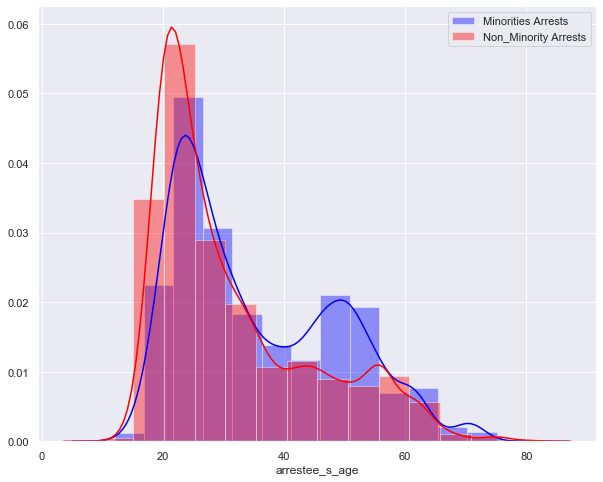

In [49]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='Minorities Arrests', kde=True, bins=14) 
sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='Non_Minority Arrests', kde=True, bins=14)
plt.legend();

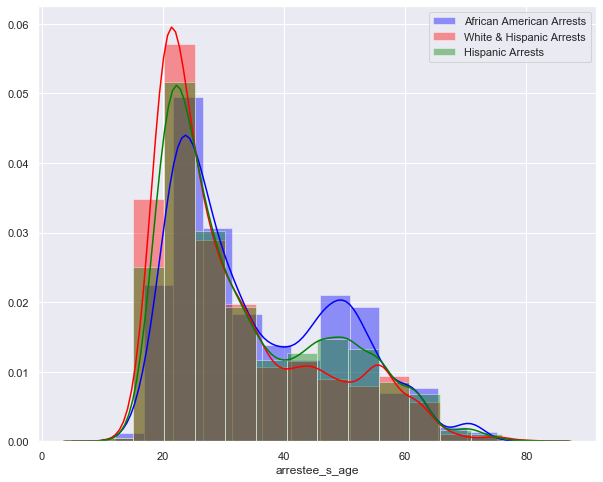

In [50]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='African American Arrests', kde=True, bins=14) 

sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='White & Hispanic Arrests', kde=True, bins=14)

sn.distplot(pam[pam.arrestee_ethnicity!='H'].arrestee_s_age, color='green', 
            label='Hispanic Arrests', kde=True, bins=14)

plt.legend();

These are the attributes for race. A for Asian, B for Black (African American), H for Hispanic, I for Indian (Native American), O for Other, U for Unknown, W for White, and nan for missing data.

In [51]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [52]:
set(pam.arrestee_ethnicity)

{'H', nan}

This below is the initial form of our deeper analysis. We are going to grab the counts for each of the races with respect to the three crimes we have chosen. The three crimes, as of our initial pool selections are; IMPAIRED DRIVING - DWI, SECOND DEGREE TRESPASS, and ASSAULT - SIMPLE. We will look at the spread of the total number of these crimes committed across these racial groups, this will give us further info on the policing habits of Chapel Hill North Carolina. This initial attempt did not work, and it is our belief that it did not work initially, due to the presence of the 'nan' term in the variables for race. We are looking to remove that , and recode it as 'U' unknown, and run the test again and see if it works this time. Further research and analysis is to follow.

In [53]:
pamC = pa.read_csv('../police-arrests-made.csv', sep = ';')
pamC = pamC.loc[:, ['charge_description', 'arrestee_s_race']]  # Keep only the columns we want here
pamC.loc[:, 'COUNT'] = 1   # Add a variable for counting unique values
pamC = pamC.groupby(['charge_description', 'arrestee_s_race']).sum()   
 # Sum the values after grouping by County, 
       # City, and Provider Type
    
pamC.head()

#pamAn = pamC.reset_index().loc[:, ['charge_description', 'arrestee_s_race', 'COUNT']]  

## Drop the city and go back to a full data frame.

#pamAn = pamAn.groupby(['charge_description', 'arrestee_s_race']).sum()

## Redo the gather but now ignoring City

#pamAn = pamAn.reset_index()

## Set it back to a full data frame.

#pamAn = pamAn[pamAn['arrestee_s_race']=='Preschool Program']

#plt.figure(figsize = (10, 15))
#sn.set(style='darkgrid')
#sn.barplot(x='arrestee_s_race', y='COUNT', data=pamAn)
#plt.title('Crimes divided by Race Count');

,,COUNT
charge_description,arrestee_s_race,
(FTA) COMMUNICATE THREATS,W,1
(FTA) HIT/RUN LEAVE SCENE OF PROPERTY DAMAGE,B,1
(FTA) RECKLESS DRIVING,B,1
(FTA) SPEEDING,B,1
(OFA) PROBATION VIOLATION,W,1


In [54]:
pamC.tail()

COUNT
charge_description             arrestee_s_race       
WORTHLESS CHECK                W                   19
WORTHLESS CHECKS               B                    1
WRONG WAY - ONE WAY ST         B                    1
                               W                    1
WRONG WAY ON DUAL LANE HIGHWAY W                    2

In [55]:
pamC.shape

(1834, 1)

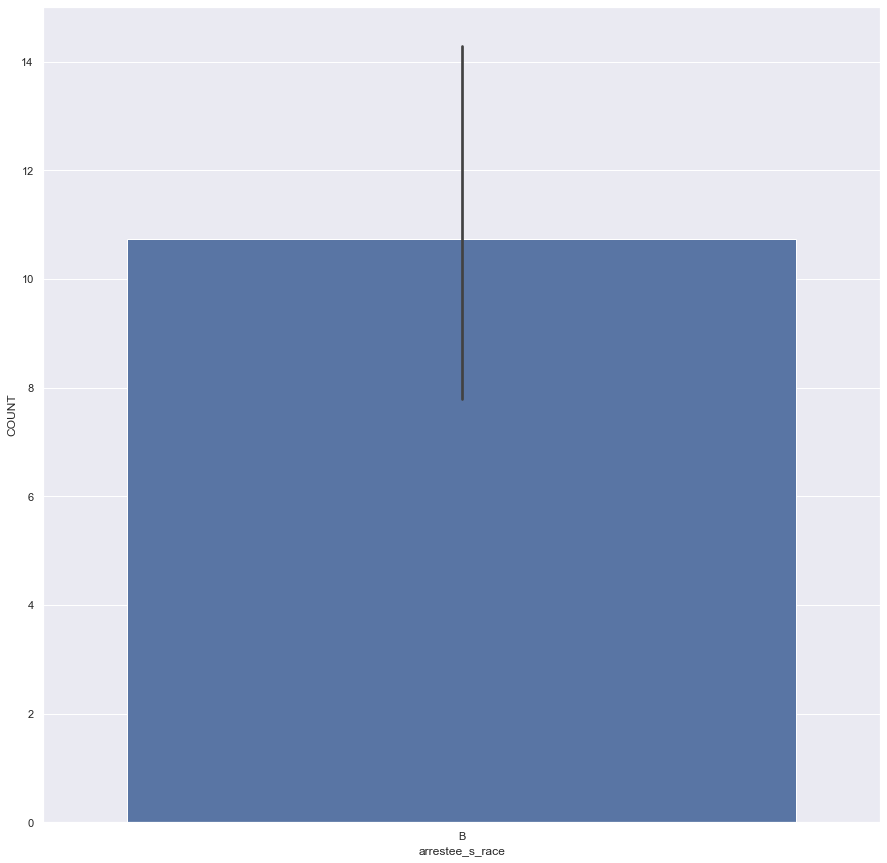

In [56]:
pamAn = pamC.reset_index().loc[:, ['charge_description', 'arrestee_s_race', 'COUNT']]  

## Drop the city and go back to a full data frame.

pamAn = pamAn.groupby(['charge_description', 'arrestee_s_race']).sum()

## Redo the gather but now ignoring City

pamAn = pamAn.reset_index()

## Set it back to a full data frame.

pamAn = pamAn[pamAn['arrestee_s_race']=='B']

plt.figure(figsize = (15, 15))
#sn.set(style='darkgrid')
sn.barplot(x='arrestee_s_race', y='COUNT', data=pamAn)
#plt.title('Crimes divided by Race Count');

In [57]:
# Impared Driving DWI
# Second Degree Trespass
# Assault - Simple

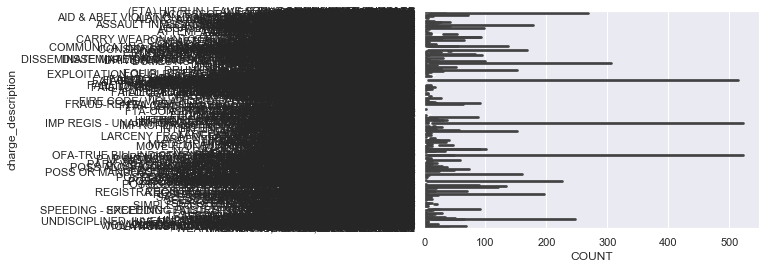

In [58]:
sn.barplot(x = 'COUNT', y = 'charge_description', data = pamC.reset_index() )

In [61]:
pamC

,,COUNT
charge_description,arrestee_s_race,
(FTA) COMMUNICATE THREATS,W,1
(FTA) HIT/RUN LEAVE SCENE OF PROPERTY DAMAGE,B,1
(FTA) RECKLESS DRIVING,B,1
(FTA) SPEEDING,B,1
(OFA) PROBATION VIOLATION,W,1
...,...,...
WORTHLESS CHECK,W,19
WORTHLESS CHECKS,B,1
WRONG WAY - ONE WAY ST,B,1


In [27]:
set(pam.ucr_code)

{110.0,
 640.0,
 nan,
 200.0,
 300.0,
 410.0,
 411.0,
 510.0,
 620.0,
 630.0,
 670.0,
 690.0,
 710.0,
 810.0,
 811.0,
 820.0,
 900.0,
 1015.0,
 1027.0,
 1110.0,
 1120.0,
 1140.0,
 1150.0,
 1170.0,
 1180.0,
 1190.0,
 1210.0,
 1290.0,
 1310.0,
 1320.0,
 1330.0,
 1400.0,
 1530.0,
 1550.0,
 1590.0,
 1710.0,
 1720.0,
 1730.0,
 1770.0,
 1780.0,
 1810.0,
 1820.0,
 1834.0,
 1890.0,
 2020.0,
 2030.0,
 2090.0,
 2100.0,
 2212.0,
 2214.0,
 2222.0,
 2223.0,
 2230.0,
 2240.0,
 2290.0,
 2410.0,
 2430.0,
 2440.0,
 2450.0,
 2490.0,
 2520.0,
 2570.0,
 2590.0,
 2620.0,
 2630.0,
 2640.0,
 2650.0,
 2660.0,
 2670.0,
 2680.0,
 2690.0,
 4010.0,
 9910.0}

Violent Crime Codes:
    0110 - Murder-First Degree-Attempt
    0640 - B&E-Vehicle
    0200 - Rape 1st Degree
    0300 - Common Law Robbery
    0410 - Assault Inflicting Serious Injury
    0411 - Assault LEO & Inflicting Injury
    0510 - B&E Misdemeanor
    0810 - Assault & Battery
    0811 - Assault on Government Official
    0820 - Communicate Threats
    1530 - Carrying Concealed Weapon Illegally
    1550 - Discharging Firearm/ BB Gun
    1590 - Possessing Weapon of Mass Destruction
    1710 - Peeping
    1720 - Crime against Nature
    1730 - Indecent Exposure
    1770 - Statutory Rape/Sex Offense
    1780 - Child Indecent Liberties
    2030 - Contributing to the Delinquency of a Minor
    2090 - Assault on a Female
    2100 - Impaired Driving DWI
    2212 - Inderage Possession of Spiritious Liquor
    2214 - Open Container
    2222 - Underage Possession
    2223 - Driver Consuming
    2230 - Aid & Abet Underage Alcohol Usage
    2240 - Consuming ON OFF Premises
    2290 - Consuming on Unauthorized Premises
    2410 - Disorderly Conduct
    2430 - Fighting
    2440 - Failure to Disperse
    2450 - Drunk/Dispruptive
    2490 - False Imprisonment
    2520 - Dissemination of Obscene Material to a Minor (Under 16)
    2570 - Exploiting Child
    2590 - Performing Harmful or Obscene acts in front of a minor
    2620 - Kidnapping
    2630 - Resising Arrest
    2640 - Violating Domestic Violence Protective Order
    2650 - Obstructing LEO Work
    2660 - Parole Violation
    2670 - 2nd Degree Trespassing
    2680 - Public Urination
    2690 - Fugitive
    4010 - Driving While License Revoked
    
    
Property Crime Codes:
    0620 - Larceny from person
    0630 - Larceny (Switch Price Tag)
    0670 - Break Coin Machine
    0690 - Larceny All other
    0710 - MV Theft - Automobile
    0900 - Arson 1st Degree
    1015 - Forgery-Uttering
    1027 - Counterfeiting
    1110 - Fraud - Worthless Check
    1120 - Possession of Fraudulent ID
    1140 - Unauthorized use of Conveyance
    1150 - Credit Card Fraud
    1170 - Identity Theft
    1180 - Accessing Computers
    1190 - Manufacturing Fraudulent Forms of ID
    1210 - Embezzlement
    1290 - Larceny by Employees
    1310 - Recreational Stolen Goods
    1320 - Larceny from Person
    1330 - Possession of Stolen Goods
    1400 - Damage-Personal Property
    2020 - Non-Support Child
    9910 - Littering
    
Narcotic Crime Codes:
    1810 - Poss Narcotics
    1820 - Drugs-Counterfeit
    1834 - Drug Paraphernalia
    1890 - Drugs on School Property
    

In [60]:
pam = pa.read_csv('../police-arrests-made.csv', sep = ';')

pam_dict1 = {x:'Violent Crime' for x in list(set(pam.ucr_code))
             if x in [110,640,200,300,410,411,510,810,811,820,1530
                      ,1550,1590,1710,1720,1730,1770,1780,2030,2090,2100,2212,
                      2214,2222,2223,2230,2240,2290,2410,2430,2440,2450,2490,
                      2520,2570,2590,2620,2630,2640,2650,2670,2680,2690,4010]}
pam_dict2 = {x:'Property Crime' for x in list(set(pam.ucr_code)) 
             if x in[620,630,670,690,710,900,1015,1027,1110,1120,1140,1150,1170,1180,1190,1210,1290,1310,1320,
                      1330,1400,2020]}
pam_dict3 = {x:'Narcotic Crime' for x in list (set(pam.ucr_code))
             if x in [1810,1820,1834,1890]}

pam_dict1.update(pam_dict2) # merge the two dictionaries

pam_dict1.update(pam_dict3) # merge the third dictionary


pam_2 = pam.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to pam_2 will change major
    
pam_2.ucr_code = pam_2.ucr_code.map(pam_dict1)  # use the dictionary we made to recode the values with .map()

pam_2 # print the dataframe to check if there is a problem


,armainid,arrest_date,arrest_time,address,charge_description,ucr_code,felony_or_misdemeanor,arrestee_s_age,arrestee_s_race,arrestee_s_sex,arrestee_ethnicity
0,"31,198",2013-11-11,10:58 PM,"100 N COLUMBIA ST CHAPEL HILL, NC 27514",DRUGS-MAINTAIN,Narcotic Crime,M,32.0,B,M,NaN
1,"31,201",2013-11-12,2:38 PM,"828 MARTIN LUTHER KING JR BLVD CHAPEL HILL, NC...",ASSAULT-SIMPLE,Violent Crime,M,25.0,B,F,NaN
2,"31,209",2013-11-15,3:50 PM,"100 W ROSEMARY ST CHAPEL HILL, NC 27516",ASSAULT & BATTERY,Violent Crime,M,27.0,W,M,NaN
3,"31,216",2013-11-20,4:44 AM,"MLK/NEW STATESIDE DR CHAPEL HILL, NC 27514",IMPAIRED DRIVING DWI,Violent Crime,M,24.0,B,M,NaN
4,"31,216",2013-11-20,4:44 AM,"MLK/NEW STATESIDE DR CHAPEL HILL, NC 27514",DRIVING W/LIC REVOKED,Violent Crime,M,24.0,B,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18804,"26,456",2011-03-18,7:31 PM,"121 E FRANKLIN ST CHAPEL HILL, NC 27514",DRUNK / DISRUPTIVE,Violent Crime,M,50.0,B,M,NaN
18805,"24,370",2010-03-12,4:10 PM,"106 N GRAHAM ST CHAPEL HILL, NC 27516",FAIL TO APPEAR/COMPL,Violent Crime,M,41.0,B,M,NaN
18806,"26,497",2011-03-26,11:53 PM,"25 BRANDON RD CHAPEL HILL, NC 27517",NDL - SUSPENDED / REVOKED,Violent Crime,M,27.0,W,M,H
18807,"24,402",2010-03-18,9:16 PM,"1100 NC HWY 54 BYPASS CHAPEL HILL, NC 27516",ASSAULT ON FEMALE,Violent Crime,M,45.0,W,M,H


In [43]:
pam.shape


(18809, 11)

In [44]:
pam.tail()

,armainid,arrest_date,arrest_time,address,charge_description,ucr_code,felony_or_misdemeanor,arrestee_s_age,arrestee_s_race,arrestee_s_sex,arrestee_ethnicity
18804,"26,456",2011-03-18,7:31 PM,"121 E FRANKLIN ST CHAPEL HILL, NC 27514",DRUNK / DISRUPTIVE,2450.0,M,50.0,B,M,NaN
18805,"24,370",2010-03-12,4:10 PM,"106 N GRAHAM ST CHAPEL HILL, NC 27516",FAIL TO APPEAR/COMPL,2640.0,M,41.0,B,M,NaN
18806,"26,497",2011-03-26,11:53 PM,"25 BRANDON RD CHAPEL HILL, NC 27517",NDL - SUSPENDED / REVOKED,4010.0,M,27.0,W,M,H
18807,"24,402",2010-03-18,9:16 PM,"1100 NC HWY 54 BYPASS CHAPEL HILL, NC 27516",ASSAULT ON FEMALE,810.0,M,45.0,W,M,H
18808,"26,509",2011-03-29,9:03 PM,"1129 WEAVER DAIRY RD CHAPEL HILL, NC 27514",RESISTING ARREST,2650.0,M,51.0,W,M,NaN


In [62]:
set(pam_2.ucr_code)

{'Narcotic Crime', 'Property Crime', 'Violent Crime', nan}

In [63]:
pam = pa.read_csv('../police-arrests-made.csv', sep = ';')

pam_2_dict4 = {x: 0 for x in list(set(pam_2.ucr_code))
             if x in ['Violent Crime']}
pam_2_dict5 = {x: 1 for x in list(set(pam_2.ucr_code)) 
             if x in['Property Crime']}
pam_2_dict6 = {x: 2 for x in list (set(pam_2.ucr_code))
             if x in ['Narcotic Crime']}

pam_2_dict4.update(pam_2_dict5) # merge the two dictionaries

pam_2_dict4.update(pam_2_dict6) # merge the third dictionary


pam_3 = pam_2.copy()   # pandas.dataframe is a mutable object so we use the .copy() command 
                         # otherwise changes to pam_2 will change major
    
pam_3.ucr_code = pam_3.ucr_code.map(pam_2_dict4)  # use the dictionary we made to recode the values with .map()

pam_3 # print the dataframe to check if there is a problem


,armainid,arrest_date,arrest_time,address,charge_description,ucr_code,felony_or_misdemeanor,arrestee_s_age,arrestee_s_race,arrestee_s_sex,arrestee_ethnicity
0,"31,198",2013-11-11,10:58 PM,"100 N COLUMBIA ST CHAPEL HILL, NC 27514",DRUGS-MAINTAIN,2.0,M,32.0,B,M,NaN
1,"31,201",2013-11-12,2:38 PM,"828 MARTIN LUTHER KING JR BLVD CHAPEL HILL, NC...",ASSAULT-SIMPLE,0.0,M,25.0,B,F,NaN
2,"31,209",2013-11-15,3:50 PM,"100 W ROSEMARY ST CHAPEL HILL, NC 27516",ASSAULT & BATTERY,0.0,M,27.0,W,M,NaN
3,"31,216",2013-11-20,4:44 AM,"MLK/NEW STATESIDE DR CHAPEL HILL, NC 27514",IMPAIRED DRIVING DWI,0.0,M,24.0,B,M,NaN
4,"31,216",2013-11-20,4:44 AM,"MLK/NEW STATESIDE DR CHAPEL HILL, NC 27514",DRIVING W/LIC REVOKED,0.0,M,24.0,B,M,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18804,"26,456",2011-03-18,7:31 PM,"121 E FRANKLIN ST CHAPEL HILL, NC 27514",DRUNK / DISRUPTIVE,0.0,M,50.0,B,M,NaN
18805,"24,370",2010-03-12,4:10 PM,"106 N GRAHAM ST CHAPEL HILL, NC 27516",FAIL TO APPEAR/COMPL,0.0,M,41.0,B,M,NaN
18806,"26,497",2011-03-26,11:53 PM,"25 BRANDON RD CHAPEL HILL, NC 27517",NDL - SUSPENDED / REVOKED,0.0,M,27.0,W,M,H
18807,"24,402",2010-03-18,9:16 PM,"1100 NC HWY 54 BYPASS CHAPEL HILL, NC 27516",ASSAULT ON FEMALE,0.0,M,45.0,W,M,H


In [64]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [65]:
def onehot(df, feature):
    '''A function to do one-hot-encoding of a feature from a dataframe. df = dataframe'''

    pamv = list(set(df[feature])) # Make an iterable of the unique values for the feature
    
    for c in df.index: # cycle through the samples
        t = df.loc[c, feature]
        
        for test in pamv:
            if pa.isna(test):  # nan values are sort of a problem and have to be handled separately
                if pa.isna(t):
                    df.loc[c, '{}_nan'.format(feature)] = 1
                else:
                    df.loc[c, '{}_nan'.format(feature)] = 0
            else:
                if t == test:
                    df.loc[c, '{}_{}'.format(feature, test)] = 1  # Makes a new feature with name feature_value
                                                              # and codes it as a 1 if that was the value
                else:
                    df.loc[c, '{}_{}'.format(feature, test)] = 0  # and 0 otherwise
            
    return df.drop(feature, axis=1) # returns a dataframe with the encoded feature removed

In [66]:
pam_hot1 = onehot(pam_3, 'arrestee_s_race')
pam_hot1[30:40]

,armainid,arrest_date,arrest_time,address,charge_description,ucr_code,felony_or_misdemeanor,arrestee_s_age,arrestee_s_sex,arrestee_ethnicity,arrestee_s_race_nan,arrestee_s_race_O,arrestee_s_race_I,arrestee_s_race_U,arrestee_s_race_B,arrestee_s_race_A,arrestee_s_race_W,arrestee_s_race_H
30,"31,697",2014-04-01,8:19 AM,"100 E FRANKLIN ST CHAPEL HILL, NC 27514",DRIVING W/LIC REVOKED,0.0,M,26.0,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31,"31,719",2014-04-05,2:15 AM,"PRITCHARD AVE & CARR ST CHAPEL HILL, NC 27516",OPEN CONTAINER,0.0,M,22.0,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32,"31,730",2014-04-05,2:25 AM,"PRITCHARD AVE NEAR CARR ST CHAPEL HILL, NC 27516",OPEN CONTAINER,0.0,M,21.0,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,"31,761",2014-04-10,12:20 PM,"828 MARTIN LUTHER KING JR BLVD CHAPEL HILL, NC...",LARCENY - ALL OTHER,1.0,M,26.0,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34,"31,763",2014-04-10,4:30 PM,"FORSYTH AND LEGION RD CHAPEL HILL, NC 27514",PWISD II CS,2.0,F,31.0,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35,"31,763",2014-04-10,4:30 PM,"FORSYTH AND LEGION RD CHAPEL HILL, NC 27514",DRUGS-MISD POSS,2.0,M,31.0,M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36,"31,768",2014-04-10,11:28 PM,"400 BLK CHURCH STREET CHAPEL HILL, NC 27516",OPEN CONTAINER,0.0,M,21.0,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37,"31,835",2014-04-25,11:40 PM,"110 W CAMERON AVE/PITTSBORO ST CHAPEL HILL, NC...",UNDERAGE POSSESSION,0.0,M,19.0,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38,"31,844",2014-04-27,1:40 AM,"112 1/2 W. FRANKLIN ST CHAPEL HILL, NC 27516",UNDERAGE POSSESSION,0.0,M,21.0,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,"31,845",2014-04-26,11:40 PM,"100 BLOCK MALLETTE ST CHAPEL HILL, NC 27516",OPEN CONTAINER,0.0,M,29.0,M,H,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#set(pam_hot1.arrestee_s_race_nan)
#set(pam_hot1.arrestee_s_race_O)
#set(pam_hot1.arrestee_s_race_I)
#set(pam_hot1.arrestee_s_race_U)
set(pam_hot1.arrestee_s_race_B)
#set(pam_hot1.arrestee_s_race_A)
#set(pam_hot1.arrestee_s_race_W)
#set(pam_hot1.arrestee_s_race_H)

{0.0, 1.0}

TESTS TO BE COMPLETED:

~Connor~

~Logistic Regression~
       
~Faith~

~k-nearest Neighbors~
            
~Sandra~

~Linear and Quadratic Discriminant Analysis~
       
       
~Sam~

~Support Vector Machine~
       
       
Each individual will run the test and then bootstrap or cross validate, then add that to the CV_Group Presentation. It is up to the individual if they want to run the test once, then bootstrap (like the class examples go). Please save all work though, so we have it to add to the document now, or down the road.

In [67]:
temp = pam_3.groupby('ucr_code').arrestee_s_race.value_counts().unstack(0)
temp

ucr_code,0.0,1.0,2.0
arrestee_s_race,,,
A,359.0,29.0,56.0
B,6316.0,1268.0,1085.0
H,81.0,3.0,12.0
I,38.0,4.0,6.0
O,10.0,2.0,NaN
U,1.0,NaN,NaN
W,7217.0,975.0,1155.0


In [68]:
pamC = pam_3.loc[:, ['charge_description', 'arrestee_s_race']]  # Keep only the columns we want here
pamC.loc[:, 'COUNT'] = 1   # Add a variable for counting unique values
pamC = pamC.groupby(['charge_description', 'arrestee_s_race']).sum()   
 # Sum the values after grouping by County, 
       # City, and Provider Type
    
pamC.head()

#sn.barplot(x = 'COUNT', y = 'charge_description', data = pam_3.reset_index() )


,,COUNT
charge_description,arrestee_s_race,
(FTA) COMMUNICATE THREATS,W,1
(FTA) HIT/RUN LEAVE SCENE OF PROPERTY DAMAGE,B,1
(FTA) RECKLESS DRIVING,B,1
(FTA) SPEEDING,B,1
(OFA) PROBATION VIOLATION,W,1


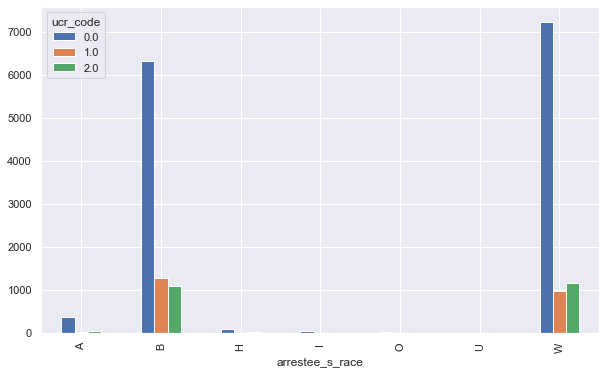

In [69]:
fig, ax = plt.subplots( figsize = (10,6))
temp.plot.bar(ax = ax)

# Logistic Regression

Connor Nelson

In [100]:
# Using the usual packages, plus scikitlearns LinearRegression tool; and numpy.random.

import pandas as pa
import numpy as np
import numpy.random as rn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [101]:
pam_hot1 = pam_hot1.dropna(subset=['arrestee_s_age', 'ucr_code'])

In [102]:
pam_hot1['arrestee_s_age']=pam_hot1['arrestee_s_age'].astype('float')
pam_hot1['arrestee_s_race_A']=pam_hot1['arrestee_s_race_A'].astype('float')
pam_hot1['arrestee_s_race_B']=pam_hot1['arrestee_s_race_B'].astype('float')
pam_hot1['arrestee_s_race_O']=pam_hot1['arrestee_s_race_O'].astype('float')
pam_hot1['arrestee_s_race_H']=pam_hot1['arrestee_s_race_H'].astype('float')
pam_hot1['arrestee_s_race_I']=pam_hot1['arrestee_s_race_I'].astype('float')
pam_hot1['arrestee_s_race_W']=pam_hot1['arrestee_s_race_W'].astype('float')
pam_hot1['arrestee_s_race_U']=pam_hot1['arrestee_s_race_U'].astype('float')
pam_hot1['arrestee_s_race_nan']=pam_hot1['arrestee_s_race_nan'].astype('float')

In [103]:
X =  np.array(pam_hot1[['arrestee_s_age','arrestee_s_race_A','arrestee_s_race_B','arrestee_s_race_O','arrestee_s_race_H','arrestee_s_race_I','arrestee_s_race_W','arrestee_s_race_U','arrestee_s_race_nan']])
y =  np.array(pam_hot1['ucr_code']) 

In [104]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [105]:
reg = LinearRegression().fit(X_train, y_train)

b, m = reg.intercept_, *reg.coef_
b, m

ValueError: too many values to unpack (expected 2)

In [110]:
X =  np.array(pam_hot1['ucr_code']) 
y =  np.array(pam_hot1[['arrestee_s_race_B']])
#y =  np.array(pam_hot1['ucr_code']) 

In [112]:
reg = LinearRegression().fit(X_train, y_train)

b, m = reg.intercept_, *reg.coef_
b, m

ValueError: too many values to unpack (expected 2)

In [ ]:
num = 60 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

In [ ]:
test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) # Define the model
        clf.fit(X_train, y_train) # Train the model
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

In [ ]:
testing_error = Error_mean[1::2]  # Grabing every other item from the Error means
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');

# K-Nearest Neighbors
Faith Camp

In [ ]:
import numpy.random as rn

In [ ]:
pam_hot1 = pam_hot1.dropna(subset=['arrestee_s_age', 'ucr_code'])

In [ ]:
pam_hot1['arrestee_s_age']=pam_hot1['arrestee_s_age'].astype('float')
pam_hot1['arrestee_s_race_A']=pam_hot1['arrestee_s_race_A'].astype('float')
pam_hot1['arrestee_s_race_B']=pam_hot1['arrestee_s_race_B'].astype('float')
pam_hot1['arrestee_s_race_O']=pam_hot1['arrestee_s_race_O'].astype('float')
pam_hot1['arrestee_s_race_H']=pam_hot1['arrestee_s_race_H'].astype('float')
pam_hot1['arrestee_s_race_I']=pam_hot1['arrestee_s_race_I'].astype('float')
pam_hot1['arrestee_s_race_W']=pam_hot1['arrestee_s_race_W'].astype('float')
pam_hot1['arrestee_s_race_U']=pam_hot1['arrestee_s_race_U'].astype('float')
pam_hot1['arrestee_s_race_nan']=pam_hot1['arrestee_s_race_nan'].astype('float')

In [ ]:

X =  np.array(pam_hot1[['arrestee_s_age','arrestee_s_race_A','arrestee_s_race_B','arrestee_s_race_O','arrestee_s_race_H','arrestee_s_race_I','arrestee_s_race_W','arrestee_s_race_U','arrestee_s_race_nan']])
y =  np.array(pam_hot1['ucr_code']) 

In [ ]:
n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1) # Define the model
clf1.fit(X_train, y_train); # Train the model
clf1.score(X_train,y_train)


In [ ]:
clf1.score(X_test,y_test)

#### Error Screen
Below the coding is advanced and needs extra work but above with the clf1 score for the training and testing I can see my error this way.

In [ ]:
def plot_cat_model(clf, X_train, y_train, X_test, y_test,''):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, 10000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [ ]:
plot_cat_model(clf1, X_train, y_train, X_test, y_test)
plt.savefig('11.2.png')

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=2) # Define the model
clf2.fit(X_train, y_train)
plot_cat_model(clf2, X_train, y_train, X_test, y_test)
plt.savefig('11.3.png')

#### Now Bootstraping
Now we test the accuracy of the K-Nearest Neighbors using the bootstrap method.

In [ ]:
num = 60 # number of bootstraps to use
Xboot = [0]*num
yboot = [0]*num

n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n)  # Note here starting with a random permutation is not necessary
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

In [ ]:
test = int(0.20*n)
maxk = 20

labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = KNeighborsClassifier(n_neighbors=k+1) # Define the model
        clf.fit(X_train, y_train) # Train the model
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

In [ ]:
testing_error = Error_mean[1::2]  # Grabing every other item from the Error means
kk = range(1, maxk+1)
plt.plot(kk, testing_error, 'b-');
plt.savefig('11.6.png')

In [ ]:
import matplotlib.colors as pltco # A package to help with coloring plots

In [ ]:
plt.figure(figsize=(8, 7))
sn.scatterplot(x='arrestee_s_race', y='ucr_code', hue='ucr_code', data=pam_3)
plt.savefig('11.1.png')

# LINEAR AND QUADRATIC DISCRIMINANT ANALYSIS: 

Sandra Keta

In [70]:
import matplotlib.colors as pltco
import numpy.random as rn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [71]:
pam_3 = pam_3.dropna(subset=['arrestee_s_age', 'ucr_code'])

In [72]:
X = np.atleast_2d(np.array(pam_3['arrestee_s_age'])).transpose()
y = np.array(pam_3['ucr_code'])

In [73]:
n = X.shape[0]
test = int(0.20*n)            
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       
y_test = y[:test]
X_train = X[test:]     
y_train = y[test:]

In [74]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train);
print('Training Error: {}'.format(clf.score(X_train, y_train)))
print('Testing Error: {}'.format(clf.score(X_test, y_test)))

Training Error: 0.7582153169256153
Testing Error: 0.7491749174917491


Now, checking the performance with bootstraps: 

In [78]:
num = 60 
Xboot = [0]*num
yboot = [0]*num

In [79]:
n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n)  
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

In [83]:
test = int(0.20*n)
maxk = 20
labels = [ ['train_{}'.format(x), 'test_{}'.format(x)] for x in range(1, maxk+1)]
labels = [x for sublist in labels for x in sublist]

In [84]:
Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = LinearDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,...,train_16,test_16,train_17,test_17,train_18,test_18,train_19,test_19,train_20,test_20
57,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075,...,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075,0.759865,0.748075
58,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850,...,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850,0.756359,0.753850
59,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901,...,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901,0.754090,0.759901
Mean,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670,...,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670,0.755753,0.755670
Standard Deviation,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412,...,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412,0.004069,0.006412


In [85]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [86]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
print('Training Error: {}'.format(clf.score(X_train, y_train)))
print('Testing Error: {}'.format(clf.score(X_test, y_test)))

Training Error: 0.7540904716073147
Testing Error: 0.7599009900990099


In [87]:
num = 60 
Xboot = [0]*num
yboot = [0]*num

In [91]:
n = X.shape[0]
for s in range(num):
    sample = np.random.randint(0, n, n)  
    Xboot[s] = X[sample, :]
    yboot[s] = y[sample]

In [92]:
Error = pa.DataFrame(  np.array([0]*num*2*maxk).reshape(num, 2*maxk), columns = labels)

for s in range(num):
    X_test = Xboot[s][:test]
    y_test = yboot[s][:test]
    X_train = Xboot[s][test:]
    y_train = yboot[s][test:]
    
    for k in range(maxk):
        clf = QuadraticDiscriminantAnalysis()
        clf.fit(X_train, y_train)
        Error.iloc[s, 2*k] = clf.score(X_train, y_train) 
        Error.iloc[s, 2*k+1] = clf.score(X_test, y_test)
      
Error_mean = [0]*2*maxk
Error_std = [0]*2*maxk
for c in range(2*maxk):
    Error_mean[c] = np.mean(Error.iloc[:num, c])
    Error_std[c] = np.std(Error.iloc[:num, c])
    
Error = Error.append( pa.Series(Error_mean, index=Error.columns), ignore_index=True)
Error = Error.append( pa.Series(Error_std, index=Error.columns), ignore_index=True)
Error.index = list(range(num)) + ['Mean', 'Standard Deviation']
Error.tail()

,train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4,train_5,test_5,...,train_16,test_16,train_17,test_17,train_18,test_18,train_19,test_19,train_20,test_20
57,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926,...,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926,0.756222,0.762926
58,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925,...,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925,0.754503,0.751925
59,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701,...,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701,0.755190,0.757701
Mean,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647,...,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647,0.756623,0.755647
Standard Deviation,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248,...,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248,0.003121,0.007248


# Support Vector Machine Analysis

Samantha Wells

In [ ]:
pam_hot1 = pam_hot1.dropna(subset=['arrestee_s_age' , 'ucr_code'])
X = np.array(pam_hot1[['arrestee_s_race_nan', 'arrestee_s_race_B' , 'arrestee_s_race_I' , 'arrestee_s_race_O' ,
                       'arrestee_s_race_U' , 'arrestee_s_race_H' , 'arrestee_s_race_A' , 'arrestee_s_race_W']])
y = np.array(pam_hot1['ucr_code'] )

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X[y==0, 0], X[y==0, 1], 'r.')
plt.plot(X[y==1, 0], X[y==1, 1], 'g.')
plt.plot(X[y==2, 0], X[y==2, 1], 'b.');
plt.savefig('13.15.png')

In [ ]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors
import numpy.random as rn
def plot_cat_model_3(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))
    
# Updating the plotting function for three categories

In [ ]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(C=1, gamma='scale', kernel='linear')
sv.fit(X_train, y_train)
print('Training Error: {}'.format(sv.score(X_train, y_train)))
print('Testing Error: {}'.format(sv.score(X_test, y_test)))

In [ ]:
X = np.array(pam_3[['arrestee_s_race','arrestee_s_age']])
y = np.array(pam_3['ucr_code'] )

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X[y==0, 0], X[y==0, 1], 'r.')
plt.plot(X[y==1, 0], X[y==1, 1], 'g.')
plt.plot(X[y==2, 0], X[y==2, 1], 'b.');
plt.savefig('13.15.png')

In [ ]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors
import numpy.random as rn
def plot_cat_model_3(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))
    
# Updating the plotting function for three categories

In [ ]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(C=1, gamma='scale', kernel='linear')
sv.fit(X_train, y_train)
print('Training Error: {}'.format(sv.score(X_train, y_train)))
print('Testing Error: {}'.format(sv.score(X_test, y_test)))

In [ ]:
X = np.array(pam_3[['arrestee_s_age']])
y = np.array(pam_3['ucr_code'] )

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(X[y==0, 0], 'r.')
plt.plot(X[y==1, 0], 'g.')
plt.plot(X[y==2, 0], 'b.');
plt.savefig('13.15.png')

In [ ]:
# A bit of code for plotting the decision boundaries in a categorical problem with two predictors and two values for the result
# Also prints out the training and testing errors
import numpy.random as rn
def plot_cat_model_3(clf, X_train, y_train, X_test, y_test):

    h = 0.1 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    cmap_light = pltco.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = pltco.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))
    
# Updating the plotting function for three categories

In [ ]:
# We shuffle the data using a random permutation

n = X.shape[0]
test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(C=1, gamma='scale', kernel='linear')
sv.fit(X_train, y_train)
print('Training Error: {}'.format(sv.score(X_train, y_train)))
print('Testing Error: {}'.format(sv.score(X_test, y_test)))